Upload an image to the session storage, open it in python and display it!

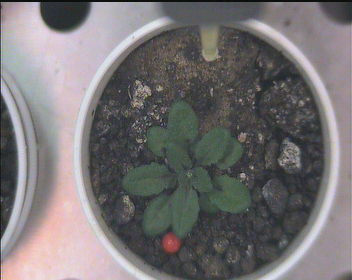

In [1]:
from PIL import Image
image = Image.open('Pot104Cycle0090.jpg')
display(image)

Get the image data as a 3D numpy array (x, y and cielab-channel) and display the shape of the array!

In [2]:
from skimage import color
data = color.rgb2lab(image)
print(data.shape)

(280, 352, 3)


Randomly sample a percentage of the pixels in the image and get their rgb values as 3-tupels.

In [3]:
from sklearn.utils import shuffle
percent = 10
samples = shuffle(data.reshape(data.shape[0] * data.shape[1], data.shape[2]), 
                  n_samples=int((percent * data.shape[0] * data.shape[1]) / 100))
samples[0:10]

array([[ 3.08111315e+01,  1.04530936e+00, -3.01120004e-01],
       [ 6.10226686e+01, -1.69232525e+00,  2.38731155e+00],
       [ 3.84045276e+01, -9.13265594e-01, -2.26748569e+00],
       [ 4.17737196e+01, -1.21625076e+01,  6.23053360e+00],
       [ 3.19198266e+01, -1.69540967e-02,  1.33679813e+00],
       [ 2.96172702e+01, -6.57316995e-02, -3.42235258e+00],
       [ 2.99435778e+01,  1.05025894e+00, -3.02491543e-01],
       [ 2.17521446e+01, -1.95978734e+00,  3.75673092e-02],
       [ 3.79678098e+01, -8.26957000e+00,  5.67387390e+00],
       [ 5.51681677e+01,  3.57621447e+00,  6.83288368e-01]])

Train the kmeans-classifier on the random samples.

In [4]:
from sklearn.cluster import KMeans
nrClusters = 6
kmeans = KMeans(n_clusters=nrClusters, max_iter=600, algorithm="full").fit(samples)
print(kmeans.cluster_centers_)
kmeans.predict([(100, 100, 100), (10,20, 5)])

[[23.78100159  0.17455735 -1.64456326]
 [64.02652276  3.20558659 -1.5342441 ]
 [37.69885471 -8.59004324  5.77302929]
 [33.72244661  0.65511082  0.27228228]
 [80.7566026   6.6444556  -0.89036282]
 [51.29912067  1.86107254  1.45718046]]


array([4, 0], dtype=int32)

Use the trained k-means classifier to predict the classes of the pixels in the whole image. 

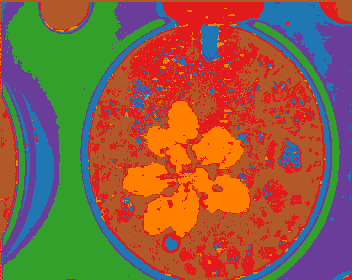

In [5]:
from matplotlib import cm
import numpy as np
labels = kmeans.predict(data.reshape(data.shape[0] * data.shape[1], data.shape[2])) / nrClusters
labelImage = Image.fromarray(np.uint8(cm.Paired_r(labels.reshape(data.shape[0], data.shape[1]))*255))
display(labelImage)